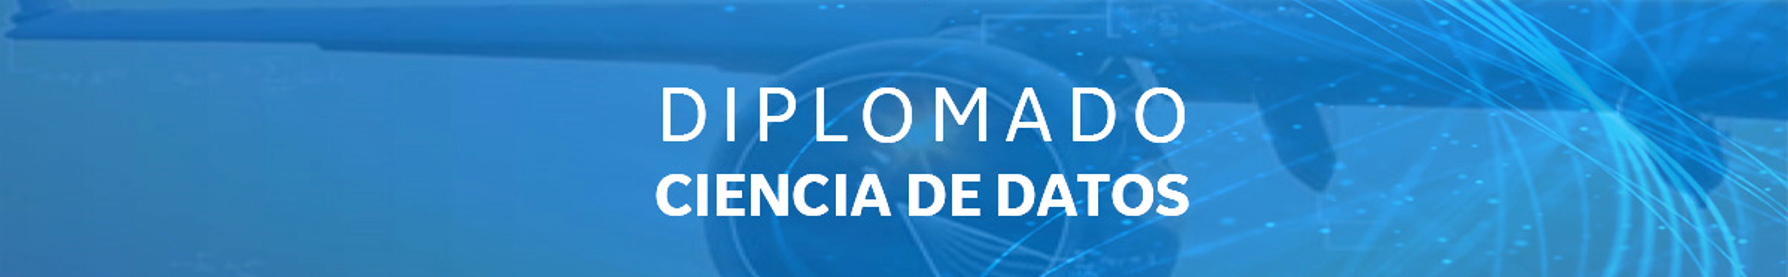

In [1]:
# Cargar Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Agrupamiento (Aprendizaje No Supervisado)

Usaremos el conjunto de datos _Rendimiento de Aereonaves_ [Airplane_Cleaned.csv](https://www.kaggle.com/datasets/heitornunes/aircraft-performance-dataset-aircraft-bluebook?select=Airplane_Cleaned.csv)

In [2]:
df = pd.read_csv('Airplane_Cleaned.csv')

df.head(6).T

,0,1,2,3,4,5
Model,15 AC Sedan,11 CC Super Chief,7 CCM Champ,7 DC Champ,7 AC Champ,11 AC Chief
Company,Aeronca,Aeronca,Aeronca,Aeronca,Aeronca,Aeronca
Engine Type,Piston,Piston,Piston,Piston,Piston,Piston
Multi Engine,NaN,NaN,NaN,NaN,NaN,NaN
TP mods,False,False,False,False,False,False
THR,NaN,NaN,NaN,NaN,NaN,NaN
SHP,145.0,85.0,90.0,85.0,65.0,65.0
Length,25.25,20.583333,21.416667,21.416667,21.416667,20.333333
Height,10.25,8.75,8.583333,8.583333,8.75,8.75
Wing Span,37.416667,36.083333,35.0,35.0,35.0,36.083333


Detalle de las caracteristicas:

* **SHP/THR**: HP or lbs thr ea engine
* **Vmax**: Max speed Knots
* **Vcruise**: Rcmnd cruise Knots
* **Vstall**: Stall Knots dirty
* **FW**: Fuel gal/lbs
* **Hmax**: All eng service ceiling
* **Hmax (One)**: Eng out service ceiling
* **ROC**: All eng rate of climb
* **ROC (One)**: Eng out rate of climb
* **Vlo**: Takeoff over 50ft
* **Slo**: Takeoff ground run
* **Vl**: Landing over 50ft
* **Sl**: Landing ground roll
* **AUW**: Gross weight lbs
* **MEW**: Empty weight lbs
* **Length**: Length ft/in
* **Height**: Height ft/in
* **Wing Span**: Wing span ft/in
* **Range**: Range N.M.

## Exploración de Datos

In [3]:
# Renglones y Columnas

df.shape

(860, 25)

In [4]:
# Valores nulos (faltantes) por columna

df.isnull().sum().to_frame()

,0
Model,0
Company,0
Engine Type,0
Multi Engine,479
TP mods,0
THR,704
SHP,156
Length,14
Height,17
Wing Span,4


In [5]:
# Descripción General (Vista Transpuesta)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
THR,156.0,5605.551282,4203.397212,280.000000,2950.000000,3700.000000,6748.000,18920.000000
SHP,704.0,315.879972,214.009730,60.000000,180.000000,260.000000,327.500,1950.000000
Length,846.0,34.558117,15.372754,17.583333,25.166667,28.500000,36.625,118.916667
Height,843.0,11.353895,4.502104,5.083333,8.250000,9.666667,14.000,33.750000
Wing Span,856.0,41.418536,11.502419,16.000000,35.395833,37.083333,44.500,104.000000
FW,855.0,2967.864211,6709.408162,60.300000,338.350000,670.000000,2184.200,48217.000000
MEW,840.0,5665.048810,8855.960892,575.000000,1640.000000,2650.000000,5600.000,70841.000000
AUW,857.0,9895.823804,15951.714203,850.000000,2800.000000,4318.000000,9300.000,120152.000000
Vmax,817.0,235.985652,133.849713,76.000000,145.000000,190.000000,261.000,616.975000
Vcruise,838.0,213.960310,118.779895,57.000000,132.000000,175.000000,241.000,566.950000


<AxesSubplot:>

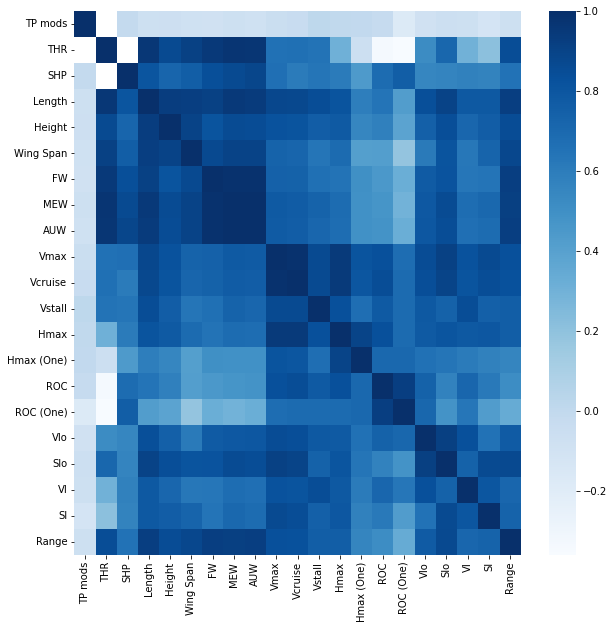

In [6]:
# Correlación de Variables

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues')

## Preparando Datos

Para fines explicativos, seleccionemos dos variables para poder graficar los datos en 2D.

Usemos las características:
* **Hmax**: Altitud máxima con todos los motores operando
* **Vmax**: Velocidad máxima en nudos

In [7]:
# Seleccionemos las variables

df_data = df[ ['Hmax', 'Vmax'] ]

# Mostart Nulos
df_data.isnull().sum().to_frame()

,0
Hmax,33
Vmax,43


In [8]:
# Eliminemos los datos incompletos

print('Columnas y renglones antes de eliminar nulos:', df_data.shape )

df_data.dropna(inplace=True)

print('Columnas y renglones después de eliminar nulos:', df_data.shape )

Columnas y renglones antes de eliminar nulos: (860, 2)
Columnas y renglones después de eliminar nulos: (794, 2)


<AxesSubplot:title={'center':'Altitud Máxima vs. Velocidad Máxima'}, xlabel='Hmax', ylabel='Vmax'>

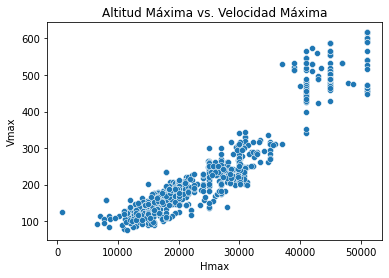

In [9]:
# Grafiquemos: Altitud Máxima vs Velocidad Máxima

plt.title('Altitud Máxima vs. Velocidad Máxima')
sns.scatterplot(data=df_data, x='Hmax', y='Vmax')

# k-means (Agrupamiento)

Utilicemos el algoritmo de k-medias para generar poblaciones con base en los datos que tenemos. Este algoritmo esta disponible en la libreria sklearn

In [10]:
from sklearn.cluster import KMeans

X = df_data.values

# Pidamos al algoritmo que divida la población en 2 (n_clusters)
agrupamiento = KMeans(n_clusters=2, random_state=0)

# Corramos el algoritmo
agrupamiento.fit(X)

# Agregemos el numero de grupo (cluster) a nuestro dataframe
df_data['cluster'] = agrupamiento.labels_

print('Centroides')
print(agrupamiento.cluster_centers_)

df_data

Centroides
[[38894.96734694   397.18178776]
 [18794.17668488   165.92349727]]


,Hmax,Vmax,cluster
0,13000.0,104.0,1
1,12300.0,89.0,1
2,16000.0,90.0,1
3,13000.0,88.0,1
4,12500.0,83.0,1
...,...,...,...
855,22500.0,198.0,1
856,22500.0,190.0,1
857,24000.0,183.0,1
858,22000.0,130.0,1


<AxesSubplot:title={'center':'Kmeans con dos clusters - Sin preprocesamiento'}, xlabel='Hmax', ylabel='Vmax'>

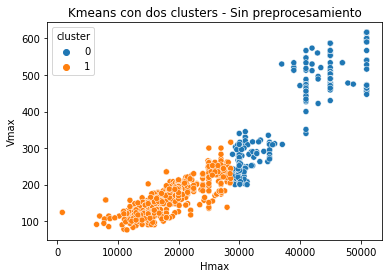

In [11]:
# Graficar clusters resultantes

plt.title('Kmeans con dos clusters - Sin preprocesamiento')
sns.scatterplot(data=df_data, x='Hmax', y='Vmax', hue='cluster')

| ALERTA: Importante considerar que este algoritmo mide las distancias entre puntos y es afectado si las variables utilizadas tienen rangos muy diferentes, ej.: 0-600 y 0-50,000. En este caso el algoritmo toma principalemente en cosideración a la variable cuyo rango es más grande |
| --- |


,Hmax,Vmax
0,38894.967347,397.181788
1,18794.176685,165.923497


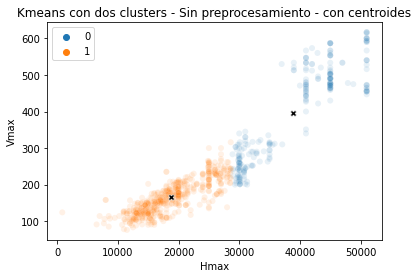

In [12]:
# Graficar Centroides

df_centroides = pd.DataFrame(agrupamiento.cluster_centers_, columns=['Hmax', 'Vmax'])

plt.title('Kmeans con dos clusters - Sin preprocesamiento - con centroides')
sns.scatterplot(data=df_data, x='Hmax', y='Vmax', hue='cluster', alpha=0.1)
sns.scatterplot(data=df_centroides, x='Hmax', y='Vmax', color='black', marker='X')

df_centroides

### Agrupación con pre-procesamiento de datos

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparar Datos
df_data = df[ ['Hmax', 'Vmax'] ]
df_data.dropna(inplace=True)
X = df_data.values

# Usemos el encoder StandarScaler
encoder = StandardScaler()
X_encoded = encoder.fit_transform( X )

# Corramos el algoritmo
agrupamiento.fit(X_encoded)

# Agregemos el número de grupo (cluster) a nuestro dataframe
df_data['cluster'] = agrupamiento.labels_

print('Centroides')
print(agrupamiento.cluster_centers_)

df_data

Centroides
[[ 1.76812785  1.9057515 ]
 [-0.39503627 -0.42578423]]


,Hmax,Vmax,cluster
0,13000.0,104.0,1
1,12300.0,89.0,1
2,16000.0,90.0,1
3,13000.0,88.0,1
4,12500.0,83.0,1
...,...,...,...
855,22500.0,198.0,1
856,22500.0,190.0,1
857,24000.0,183.0,1
858,22000.0,130.0,1


<AxesSubplot:title={'center':'Kmeans con dos clusters - Con preprocesamiento'}, xlabel='Hmax', ylabel='Vmax'>

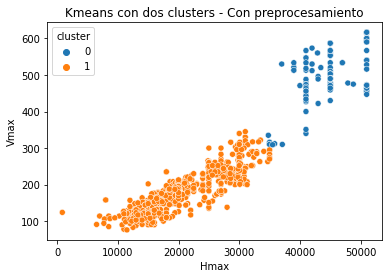

In [14]:
# Graficar clusters resultantes

plt.title('Kmeans con dos clusters - Con preprocesamiento')
sns.scatterplot(data=df_data, x='Hmax', y='Vmax', hue='cluster')

## Discusión: ¿Cuántos clusters debo seleccionar?

Existen diferentes métodos, pero uno de ellos consiste en revisar la metrica WCSS (_Within Cluster Sum of Squares_),
que indica la suma de los cuadrados dentro de cada grupo.

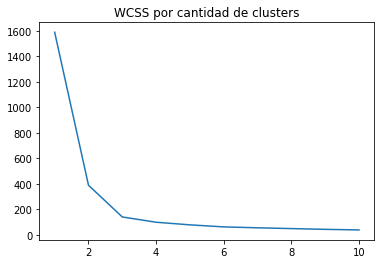

In [15]:
# Calcular WCSS usando Kmeans con 1-10 clusters

wcss = []
rango_clusters = range(1,11)

for k in rango_clusters:
    agrupamiento = KMeans(n_clusters=k, random_state=0)
    agrupamiento.fit( X_encoded )
    
    # ¿Que es "inertia_"?
    wcss.append(agrupamiento.inertia_)


plt.title('WCSS por cantidad de clusters')
plt.plot(rango_clusters, wcss)

Selección de cantidad de clusters mediante método del codo (elbow). En este caso, 3 es el número de clusters recomendado usando este método

<AxesSubplot:title={'center':'Kmeans con tres clusters - Con preprocesamiento'}, xlabel='Hmax', ylabel='Vmax'>

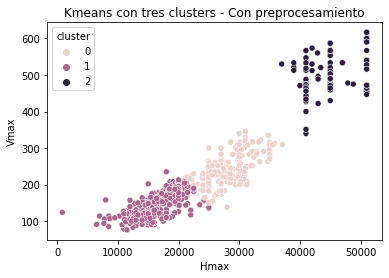

In [16]:
# Usemos la recomendacion de 3 clusters

agrupamiento = KMeans(n_clusters=3, random_state=0)
agrupamiento.fit( X_encoded )

# Grafiquemos los grupos
df_data['cluster'] = agrupamiento.labels_
plt.title('Kmeans con tres clusters - Con preprocesamiento')
sns.scatterplot(data=df_data, x='Hmax', y='Vmax', hue='cluster')

<AxesSubplot:title={'center':'Kmeans con tres clusters - Con preprocesamiento'}, xlabel='Hmax', ylabel='Vmax'>

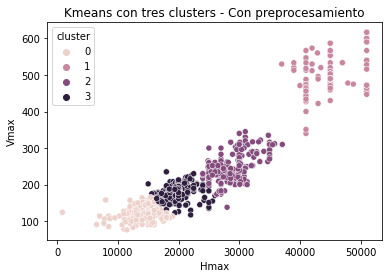

In [19]:
# Usemos la recomendacion de 3 clusters

agrupamiento = KMeans(n_clusters=4, random_state=0)
agrupamiento.fit( X_encoded )

# Grafiquemos los grupos
df_data['cluster'] = agrupamiento.labels_
plt.title('Kmeans con tres clusters - Con preprocesamiento')
sns.scatterplot(data=df_data, x='Hmax', y='Vmax', hue='cluster')